In [4]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
import matplotlib.pyplot as plt

from mppi import Parsers as P, Utilities as U
from mppi.Utilities import Constants as C
from mppi.Utilities import Dos

h_red = C.Planck_reduced_ev_ps*1e3 # hbar in eV*fs
h = C.Planck_ev_ps*1e3 # h in eV*fs

# Analysis of the JDOS

We study the JDOS of the transition for various k sampling.

## Case 1

We analyze the k sampling used to perform the actual simulation. The k points are selected to
satisfy v-c1 transition in the spread of the pulse

In [3]:
ref_run_dir = 'RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm'
#ref_outpath = 'RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4_extended-bands/'
ref_outpath = 'RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4/'

In [4]:
scissor = 0.9548 # (eV) (taken from QE_Analysis it gives a direct gap of 1.42 eV)
energy = 1.46 # eV energy of the pulse
omega = energy/h_red # angular frequency of the pulse
period = h/energy # period of the pulse fs

In [5]:
ref_results = P.YamboParser.from_path(ref_run_dir,ref_outpath)

Parse file RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4/o-0.5ps-direct-decay-int_1e4_1e4.polarization
Parse file RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4/o-0.5ps-direct-decay-int_1e4_1e4.carriers
Parse file RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4/o-0.5ps-direct-decay-int_1e4_1e4.external_field
Parse file RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4/o-0.5ps-direct-decay-int_1e4_1e4.current
Parse file : RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/SAVE/ns.db1
Parse file : RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4/ndb.dipoles
Spin dipoles not found in the ndb.dipoles
Parse file : RT_Echo_k509-activated-energy_1.46-width_0.025/FixSymm/0.5ps-direct-decay-int_1e4_1e4/ndb.RT_G_PAR


In [6]:
trans_vtoc1 = ref_results.dft.get_transitions(initial=[1,2,3],final=[4],set_scissor=scissor)
trans_vtoc2 = ref_results.dft.get_transitions(initial=[1,2,3],final=[5],set_scissor=scissor)
trans_c1toc2 = ref_results.dft.get_transitions(initial=[4],final=[5],set_scissor=scissor)

In [7]:
dos = Dos()
dos.append(trans_vtoc1.flatten(),minVal=0,maxVal=3,eta=1e-3,label='v to c1')
dos.append(trans_vtoc2.flatten(),minVal=2,maxVal=6,eta=1e-3,label='v to c2')
dos.append(trans_c1toc2.flatten(),minVal=2,maxVal=4,eta=1e-3,label='c1 to c2')

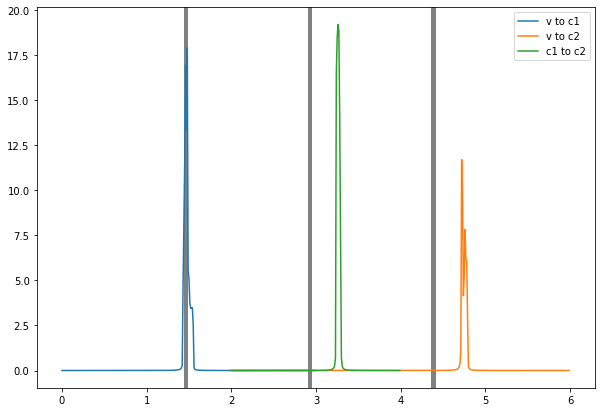

In [13]:
omega = 1.46
width = 0.02

fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.axvspan(omega-width,omega+width,color='grey')
ax1.axvspan(2*omega-width,2*omega+width,color='grey')
ax1.axvspan(3*omega-width,3*omega+width,color='grey')
dos.plot(plt)

In [25]:
for ind in range(len(dos.dos)):
    print(dos.dos[ind][0][np.where(dos.dos[ind][1]==max(dos.dos[ind][1]))[0]][0],omega*(ind+1))

1.48 1.46
4.719999999999942 2.92
3.259999999999973 4.38


The $2\omega$ and $3\omega$ transitions cannot be activated....

From this plot we see that if we use this k sampling we pulse is not able to
activate transition different from the leading ones even if we consider pulses with
large energy spread.

## Case 2

Same k sampling as before but without the selection of points resonant with the leading transition resonant width the pulse energy

In [37]:
file = 'NSCF/bnds_8-kpoints_1000-sampling_random_close_Gamma_kspan0.04.save/data-file-schema.xml'
data = P.PwParser(file)

Parse file : NSCF/bnds_8-kpoints_1000-sampling_random_close_Gamma_kspan0.04.save/data-file-schema.xml


In [38]:
trans_vtoc1 = data.get_transitions(initial=[1,2,3],final=[4],set_gap=1.42)
trans_vtoc2 = data.get_transitions(initial=[1,2,3],final=[5],set_gap=1.42)
trans_c1toc2 = data.get_transitions(initial=[4],final=[5],set_gap=1.42)

In [39]:
dos = Dos()
dos.append(trans_vtoc1.flatten(),minVal=0,maxVal=3,eta=1e-3,label='v to c1')
dos.append(trans_vtoc2.flatten(),minVal=2,maxVal=6,eta=1e-3,label='v to c2')
dos.append(trans_c1toc2.flatten(),minVal=2,maxVal=4,eta=1e-3,label='c1 to c2')

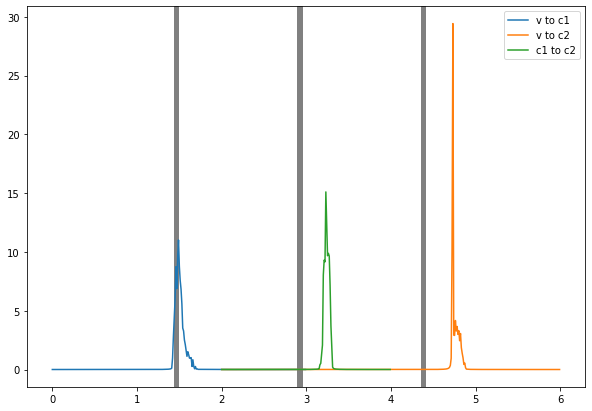

In [42]:
omega = 1.46
width = 0.025

fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.axvspan(omega-width,omega+width,color='grey')
ax1.axvspan(2*omega-width,2*omega+width,color='grey')
ax1.axvspan(3*omega-width,3*omega+width,color='grey')
dos.plot(plt)

Even in this case we see that within this sampling we can't activated transitions others than the leading ones, even for 
short pulses with a 0.4 eV total spread

## Case 3

Extended k sampling with volume 0.1

In [43]:
file = 'NSCF/bnds_8-kpoints_1000-sampling_random_close_Gamma_kspan0.1.save/data-file-schema.xml'
data = P.PwParser(file)

Parse file : NSCF/bnds_8-kpoints_1000-sampling_random_close_Gamma_kspan0.1.save/data-file-schema.xml


In [44]:
trans_vtoc1 = data.get_transitions(initial=[1,2,3],final=[4],set_gap=1.42)
trans_vtoc2 = data.get_transitions(initial=[1,2,3],final=[5],set_gap=1.42)
trans_c1toc2 = data.get_transitions(initial=[4],final=[5],set_gap=1.42)

In [45]:
dos = Dos()
dos.append(trans_vtoc1.flatten(),minVal=0,maxVal=3,eta=1e-3,label='v to c1')
dos.append(trans_vtoc2.flatten(),minVal=2,maxVal=6,eta=1e-3,label='v to c2')
dos.append(trans_c1toc2.flatten(),minVal=2,maxVal=4,eta=1e-3,label='c1 to c2')

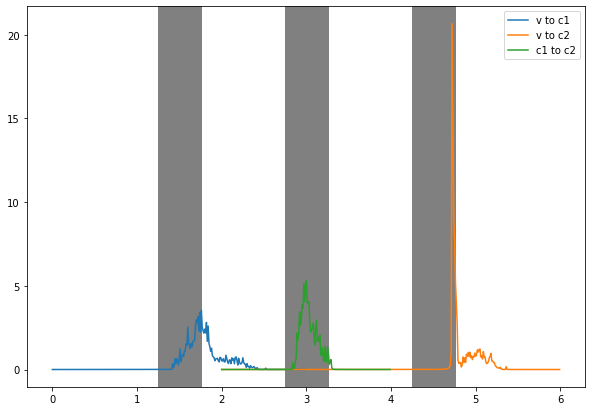

In [48]:
omega = 1.5
width = 0.25

fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.axvspan(omega-width,omega+width,color='grey')
ax1.axvspan(2*omega-width,2*omega+width,color='grey')
ax1.axvspan(3*omega-width,3*omega+width,color='grey')
dos.plot(plt)

## Case 4

Extended k sampling with volume 0.06

In [6]:
file = 'NSCF/bnds_8-kpoints_1000-sampling_random_close_Gamma_kspan0.06.save/data-file-schema.xml'
data = P.PwParser(file)

Parse file : NSCF/bnds_8-kpoints_1000-sampling_random_close_Gamma_kspan0.06.save/data-file-schema.xml


In [7]:
trans_vtoc1 = data.get_transitions(initial=[1,2,3],final=[4],set_gap=1.42)
trans_vtoc2 = data.get_transitions(initial=[1,2,3],final=[5],set_gap=1.42)
trans_c1toc2 = data.get_transitions(initial=[4],final=[5],set_gap=1.42)

In [8]:
dos = Dos()
dos.append(trans_vtoc1.flatten(),minVal=0,maxVal=3,eta=1e-3,label='v to c1')
dos.append(trans_vtoc2.flatten(),minVal=2,maxVal=6,eta=1e-3,label='v to c2')
dos.append(trans_c1toc2.flatten(),minVal=2,maxVal=4,eta=1e-3,label='c1 to c2')

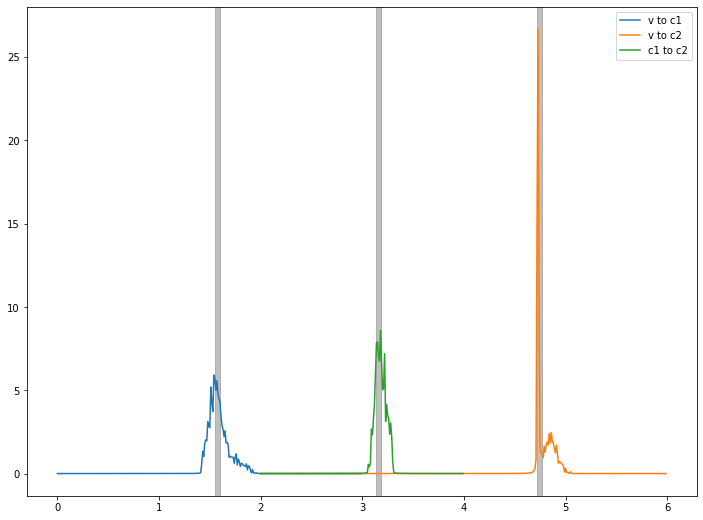

In [21]:
omega = 1.58
width = 0.025

fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.axvspan(omega-width,omega+width,color='grey',alpha=0.5)
ax1.axvspan(2*omega-width,2*omega+width,color='grey',alpha=0.5)
ax1.axvspan(3*omega-width,3*omega+width,color='grey',alpha=0.5)
dos.plot(plt)